In [1]:
import pandas as pd
import numpy as np

In [2]:
#loading the test data(cleaned) in preprocessing.ipynb

test_data=pd.read_csv('new_test.csv',header=0)

#files with NaNs #ids->15239 17790 36207 after cleaning the text(bound to happen)

test=pd.read_csv('test.csv',header=0) #just for replacing the nans by help of older test file

#removing NaN
test_data.set_value(15239,'title',test.iloc[15239]['title'])
test_data.set_value(17790,'title',test.iloc[17790]['title'])
test_data.set_value(36207,'title',test.iloc[36207]['title'])

,Unnamed: 0,id,title,content
0,0,1,spin relates subatomic particles,often hear subatomic particles property called...
1,1,2,simplest explanation string theory,would explain string theory non physicists spe...
2,2,3,lie theory representations particle physics,question posted many different forums thought ...
3,3,7,determinism ever possible,main problems need solve prove laplace determi...
4,4,9,hamilton principle,hamilton principle states dynamic system alway...
5,5,13,sound produced,using term sound life really clue sound exactl...
6,6,15,experiment would disprove string theory,know big controversy two groups physicists sup...
7,7,17,sky change color sky blue day red sunrise set ...,sky change color sky blue day red sunrise set ...
8,8,19,energy particle collisions calculated,physicists often refer energy collisions diffe...
9,9,21,monte carlo use,monte carlo method used physics


In [4]:
#loading some more stop_words
stop_words = set(['a', "a's", 'able', 'about', 'above', 'according', 'accordingly', 'across', 'actually', 'after', 'afterwards', 'again', 'against', "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', "aren't", 'around', 'as', 'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away', 'awfully', 'b', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'both', 'brief', 'but', 'by', 'c', "c'mon", "c's", 'came', 'can', "can't", 'cannot', 'cant', 'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', 'co', 'com', 'come', 'comes', 'concerning', 'consequently', 'consider', 'considering', 'contain', 'containing', 'contains', 'corresponding', 'could', "couldn't", 'course', 'currently', 'd', 'definitely', 'described', 'despite', 'did', "didn't", 'different', 'do', 'does', "doesn't", 'doing', "don't", 'done', 'down', 'downwards', 'during', 'e', 'each', 'edu', 'eg', 'eight', 'either', 'else', 'elsewhere', 'enough', 'entirely', 'especially', 'et', 'etc', 'even', 'ever', 'every', 'everybody', 'everyone', 'everything', 'everywhere', 'ex', 'exactly', 'example', 'except', 'f', 'far', 'few', 'fifth', 'first', 'five', 'followed', 'following', 'follows', 'for', 'former', 'formerly', 'forth', 'four', 'from', 'further', 'furthermore', 'g', 'get', 'gets', 'getting', 'given', 'gives', 'go', 'goes', 'going', 'gone', 'got', 'gotten', 'greetings', 'h', 'had', "hadn't", 'happens', 'hardly', 'has', "hasn't", 'have', "haven't", 'having', 'he', "he's", 'hello', 'help', 'hence', 'her', 'here', "here's", 'hereafter', 'hereby', 'herein', 'hereupon', 'hers', 'herself', 'hi', 'him', 'himself', 'his', 'hither', 'hopefully', 'how', 'howbeit', 'however', 'i', "i'd", "i'll", "i'm", "i've", 'ie', 'if', 'ignored', 'immediate', 'in', 'inasmuch', 'inc', 'indeed', 'indicate', 'indicated', 'indicates', 'inner', 'insofar', 'instead', 'into', 'inward', 'is', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', 'j', 'just', 'k', 'keep', 'keeps', 'kept', 'know', 'knows', 'known', 'l', 'last', 'lately', 'later', 'latter', 'latterly', 'least', 'less', 'lest', 'let', "let's", 'like', 'liked', 'likely', 'little', 'look', 'looking', 'looks', 'ltd', 'm', 'mainly', 'many', 'may', 'maybe', 'me', 'mean', 'meanwhile', 'merely', 'might', 'more', 'moreover', 'most', 'mostly', 'much', 'must', 'my', 'myself', 'n', 'name', 'namely', 'nd', 'near', 'nearly', 'necessary', 'need', 'needs', 'neither', 'never', 'nevertheless', 'new', 'next', 'nine', 'no', 'nobody', 'non', 'none', 'noone', 'nor', 'normally', 'not', 'nothing', 'novel', 'now', 'nowhere', 'o', 'obviously', 'of', 'off', 'often', 'oh', 'ok', 'okay', 'old', 'on', 'once', 'one', 'ones', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'ought', 'our', 'ours', 'ourselves', 'out', 'outside', 'over', 'overall', 'own', 'p', 'particular', 'particularly', 'per', 'perhaps', 'placed', 'please', 'plus', 'possible', 'presumably', 'probably', 'provides', 'q', 'que', 'quite', 'qv', 'r', 'rather', 'rd', 're', 'really', 'reasonably', 'regarding', 'regardless', 'regards', 'relatively', 'respectively', 'right', 's', 'said', 'same', 'saw', 'say', 'saying', 'says', 'second', 'secondly', 'see', 'seeing', 'seem', 'seemed', 'seeming', 'seems', 'seen', 'self', 'selves', 'sensible', 'sent', 'serious', 'seriously', 'seven', 'several', 'shall', 'she', 'should', "shouldn't", 'since', 'six', 'so', 'some', 'somebody', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhat', 'somewhere', 'soon', 'sorry', 'specified', 'specify', 'specifying', 'still', 'sub', 'such', 'sup', 'sure', 't', "t's", 'take', 'taken', 'tell', 'tends', 'th', 'than', 'thank', 'thanks', 'thanx', 'that', "that's", 'thats', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there', "there's", 'thereafter', 'thereby', 'therefore', 'therein', 'theres', 'thereupon', 'these', 'they', "they'd", "they'll", "they're", "they've", 'think', 'third', 'this', 'thorough', 'thoroughly', 'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'took', 'toward', 'towards', 'tried', 'tries', 'truly', 'try', 'trying', 'twice', 'two', 'u', 'un', 'under', 'unfortunately', 'unless', 'unlikely', 'until', 'unto', 'up', 'upon', 'us', 'use', 'used', 'useful', 'uses', 'using', 'usually', 'uucp', 'v', 'value', 'various', 'very', 'via', 'viz', 'vs', 'w', 'want', 'wants', 'was', "wasn't", 'way', 'we', "we'd", "we'll", "we're", "we've", 'welcome', 'well', 'went', 'were', "weren't", 'what', "what's", 'whatever', 'when', 'whence', 'whenever', 'where', "where's", 'whereafter', 'whereas', 'whereby', 'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', "who's", 'whoever', 'whole', 'whom', 'whose', 'why', 'will', 'willing', 'wish', 'with', 'within', 'without', "won't", 'wonder', 'would', 'would', "wouldn't", 'x', 'y', 'yes', 'yet', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves', 'z', 'zero', ''])

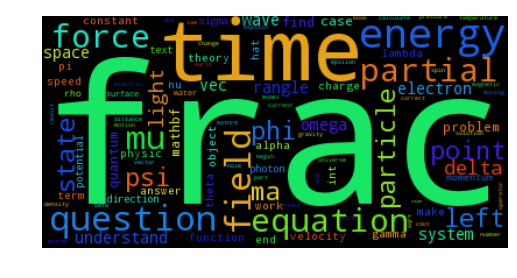

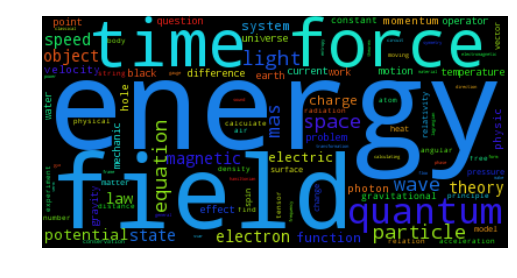

In [41]:
#content visualisation using wordcloud to check what are the most frequent words 

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

#generating wordcloud for clean content
words = WordCloud(max_words=100,random_state=1, stopwords = stop_words).generate( " ".join(test_data.content))
plt.imshow(words)
plt.axis('off')
plt.show()

#generating wordcloud for titles
words = WordCloud(max_words=100,random_state=1, stopwords = stop_words).generate( " ".join(test_data.title))
plt.imshow(words)
plt.axis('off')
plt.show()

In [42]:
# various physics tags for tag selection
all_tags = ['quantum-mechanics', 'homework-and-exercises', 'newtonian-mechanics', 'electromagnetism', 'quantum-field-theory', 'thermodynamics', 'general-relativity', 'special-relativity', 'classical-mechanics', 'forces', 'optics', 'fluid-dynamics', 'gravity', 'energy', 'particle-physics', 'electrostatics', 'cosmology', 'visible-light', 'statistical-mechanics', 'waves', 'black-holes', 'electricity', 'newtonian-gravity', 'electromagnetic-radiation', 'condensed-matter', 'experimental-physics', 'kinematics', 'photons', 'magnetic-fields', 'string-theory', 'lagrangian-formalism', 'spacetime', 'electric-circuits', 'mathematical-physics', 'mass', 'angular-momentum', 'differential-geometry', 'speed-of-light', 'solid-state-physics', 'pressure', 'operators', 'energy-conservation', 'nuclear-physics', 'momentum', 'electrons', 'rotational-dynamics', 'quantum-information', 'astrophysics', 'soft-question', 'astronomy', 'resource-recommendations', 'reference-frames', 'wavefunction', 'acoustics', 'temperature', 'conservation-laws', 'orbital-motion', 'hilbert-space', 'acceleration', 'time', 'friction', 'atomic-physics', 'quantum-spin', 'terminology', 'electric-fields', 'electric-current', 'schroedinger-equation', 'entropy', 'everyday-life', 'symmetry', 'water', 'charge', 'work', 'potential', 'universe', 'electrical-resistance', 'quantum-electrodynamics', 'velocity', 'standard-model', 'harmonic-oscillator', 'vectors', 'metric-tensor', 'gauge-theory', 'potential-energy', 'space-expansion', 'hamiltonian-formalism', 'field-theory', 'supersymmetry', 'relativity', 'material-science', 'radiation', 'entanglement', 'capacitance', 'collision', 'renormalization', 'laser', 'semiconductor-physics', 'reflection', 'group-theory', 'scattering', 'quantum-gravity', 'uncertainty-principle', 'research-level', 'earth', 'education', 'voltage', 'simulation', 'big-bang', 'measurement', 'torque', 'projectile', 'superconductivity', 'computational-physics', 'double-slit-experiment', 'units', 'conformal-field-theory', 'refraction', 'classical-electrodynamics', 'conventions', 'curvature', 'frequency', 'thermal-radiation', 'gravitational-waves', 'gauss-law', 'tensor-calculus', 'atmospheric-science', 'history', 'vacuum', 'coordinate-systems', 'definition', 'fourier-transform', 'inertial-frames', 'atoms', 'quantum-interpretations', 'probability', 'planets', 'ideal-gas', 'measurement-problem', 'path-integral', 'rotation', 'physical-chemistry', 'notation', 'faster-than-light', 'polarization', 'mass-energy', 'spring', 'interference', 'drag', 'feynman-diagram', 'maxwell-equations', 'rotational-kinematics', 'fermions', 'group-representations', 'quantum-chromodynamics', 'dark-matter', 'air', 'geometric-optics', 'geometry', 'spectroscopy', 'variational-principle', 'mathematics', 'power', 'aerodynamics', 'biophysics', 'diffraction', 'sun', 'hamiltonian', 'home-experiment', 'quantum-optics', 'quantum-computer', 'phase-transition', 'antimatter', 'neutrinos', 'integration', 'differentiation', 'specific-reference', 'time-dilation', 'dimensions', 'higgs', 'representation-theory', 'speed', 'solar-system', 'space', 'stars', 'lie-algebra', 'wave-particle-duality', 'symmetry-breaking', 'free-body-diagram', 'dirac-equation', 'boundary-conditions', 'commutator', 'dimensional-analysis', 'oscillators', 'topology', 'observers', 'density', 'spinors', 'action', 'heat', 'rocket-science', 'event-horizon', 'causality', 'singularities', 'perturbation-theory', 'elasticity', 'vector-fields', 'galaxies', 'estimation', 'tensors', 'centripetal-force', 'flow', 'resonance', 'stress-energy-tensor', 'linear-algebra', 'noethers-theorem', 'cosmological-inflation', 'moment-of-inertia', 'lenses', 'surface-tension', 'celestial-mechanics', 'plasma-physics', 'rigid-body-dynamics', 'error-analysis', 'radioactivity', 'quarks', 'crystals', 'physical-constants', 'ads-cft', 'relative-motion', 'statics', 'conductors', 'lorentz-symmetry', 'induction', 'hydrogen', 'software', 'dark-energy', 'coulombs-law', 'equilibrium', 'wavelength', 'superposition', 'geodesics', 'angular-velocity', 'buoyancy', 'eigenvalue', 'continuum-mechanics', 'electronic-band-theory', 'complex-numbers', 'centrifugal-force', 'discrete', 'geophysics', 'many-body', 'string', 'gauge-invariance', 'stress-strain', 'photoelectric-effect', 'statistics', 'fusion', 'electronics', 'dielectric', 'differential-equations', 'large-hadron-collider', 'vibration', 'observables', 'hydrostatics', 'cmb', 'density-operator', 'calculus', 'kinetic-theory', 'interactions', 'molecules', 'topological-field-theory', 'hawking-radiation', 'inductance', 'information', 'thermal-conductivity', 'free-fall', 'moon', 'diffusion', 'popular-science', 'batteries', 'topological-order', 'electrical-engineering', 'doppler-effect', 'approximations', 'metals', 'viscosity', 'covariance', 'greens-functions', 'distributions', 'particles', 'tidal-effect', 'neutrons', 'equivalence-principle', 'yang-mills', 'topological-insulators', 'vision', 'regularization', 'correlation-functions', 'constrained-dynamics', 'inertia', 'klein-gordon-equation', 'si-units', 'virtual-particles', 'bose-einstein-condensate', 'experimental-technique', 'data-analysis', 'second-quantization', 'wavefunction-collapse', 'distance', 'magnetic-moment', 'elementary-particles', 'beyond-the-standard-model', 'determinism', 'weak-interaction', 'protons', 'stability', 'fluid-statics', 'ising-model', 'nuclear-engineering', 'phase-space', 'weight', 'pauli-exclusion-principle', 'quantization', 'telescopes', 'unit-conversion', 'turbulence', 'time-evolution', 'magnetic-monopoles', 'degrees-of-freedom', 'evaporation', 'bernoulli-equation', 'propagator', 'scattering-cross-section', 'reversibility', 'partition-function', 'variational-calculus', 'chaos-theory', 'branes', 'matter', 'parity', 'states-of-matter', 'lattice-model', 'satellites', 'signal-processing', 'time-reversal-symmetry', 'decoherence', 'dipole', 'space-travel', 'quantum-anomalies', 'x-rays', 'aircraft', 'navier-stokes', 'interferometry', 'absorption', 'unitarity', 'adiabatic', 'graphene', 'thought-experiment', 'quantum-hall-effect', 'neutron-stars', 'higgs-boson', 'time-travel', 'phonons', 'non-linear-systems', 'radio', 'volume', 'orbitals', 'bosons', 's-matrix-theory', 'antennas', 'electroweak', 'ice', 'binding-energy', 'perpetual-motion', 'supergravity', 'holographic-principle', 'molecular-dynamics', 'metrology', 'gauge', 'compactification', 'lightning', 'quantum-chemistry', 'quantum-tunneling', 'wormholes', 'models', 'chirality', 'electromagnetic-induction', 'bells-inequality', 'explosions', 'nanoscience', 'particle-detectors', 'renewable-energy', 'weather', 'observational-astronomy', 'majorana-fermions', 'gamma-rays', 'dispersion', 'cosmological-constant', 'locality', 'ligo', 'gyroscopes', 'biology', 'vortex', 'strong-force', 'dirac-matrices', 'microscopy', 'classical-field-theory', 'stellar-physics', 'qft-in-curved-spacetime', 'propulsion', 'eye', 'heat-engine', 'fiber-optics', 'non-equilibrium', 'normalization', 'wick-rotation', 'convection', 'applied-physics', 'coherence', 'magnetostatics', 'perception', 'subatomic', 'theory-of-everything', 'superfluidity', 'light-emitting-diodes', 'duality', 'chern-simons-theory', 'noise', 'poincare-symmetry', 'poisson-brackets', 'supernova', 'gas', 'coriolis-effect', 'accelerator-physics', 'microwaves', 'coupled-oscillators', 'dipole-moment', 'spin-statistics', 'non-linear-optics', 'lift', 'radio-frequency', 'semiclassical', 'multipole-expansion', 'galilean-relativity', 'infrared-radiation', 'dissipation', 'effective-field-theory', 'gravitational-lensing', 'x-ray-crystallography', 'multiverse', 'gravitational-redshift', 'grassmann-numbers', 'photon-emission', 'topological-phase', 'chemical-potential', 'arrow-of-time', 'elements', 'helicity', 'precession', 'solid-mechanics', 'kaluza-klein', 'escape-velocity', 'blackbody', 'complex-systems', 'moment', 'brownian-motion', 'cp-violation', 'cooling', 'displacement', 'stellar-evolution', 'observable-universe', 'light', 'instantons', 'general-physics', 'numerical-method', 'data', 'wick-theorem', 'identical-particles', 'imaging', 'levitation', 'exoplanets', 'electrochemistry', 'born-rule', 'carnot-cycle', 'carrier-particles', 'aether', 'casimir-effect', 'confinement', 'climate-science', 'optical-materials', 'point-particle', 'warp-drives', 'anti-de-sitter-spacetime', 'linear-systems', 'foundations', 'teleportation', 'photovoltaics', 'quantum-statistics', 'meteorology', 'anyons', 'berry-pancharatnam-phase', 'bubble', 'cosmic-rays', 'visualization', 'solitons', 'poynting-vector', 'experimental-technology', 'camera', 'asteroids', 'loop-quantum-gravity', 'non-perturbative', 'grand-unification', 'integrable-systems', 'spin-model', 'spherical-harmonics', 'pair-production', 'non-locality', 'gluons', 'functional-derivatives', 'randomness', 'freezing', 'laws-of-physics', 'critical-phenomena', 'structural-beam', 'tachyon', 'textbook-erratum', 'mesons', 'material', 'ground-state', 'isotope', 'jerk', 'harmonics', 'brst', 'space-mission', 'pions', 'waveguide', 'scaling', 'isospin-symmetry', 'ions', 'gauge-symmetry', 'kerr-metric', 'hologram', 'black-hole-thermodynamics', 'capillary-action', 'shockwave', 'scale-invariance', 'redshift', 'particle-accelerators', 'chemical-compounds', 'medical-physics', 'milky-way', 'cold-atoms', 'stochastic-processes', 'color-charge', 'algorithm', 'order-of-magnitude', 'insulators', 'humidity', 'galaxy-rotation-curve', 'luminosity', 'condensation', 'density-functional-theory', 'epr-experiment', 'effective-action', 'trace', 'tight-binding', 'thermoelectricity', 'unified-theories', 'twin-paradox', 'sensor', 'baryons', 'absolute-units', 'fine-tuning', 'higgs-mechanism', 'invariants', 'ghosts', 'combustion', 'cpt-symmetry', 'quasiparticles', 'virtual-photons', 'density-of-states', 'clifford-algebra', 'normal-modes', 'numerics', 'magnetohydrodynamics', 'geomagnetism', 'ionization-energy', 'technology', 'piezoelectric', 'phase-diagram', 'quantum-states', 'machs-principle', 'matrix-elements', 'leptons', 'anticommutator', 'fermis-golden-rule', 'length-contraction', 'solar-system-exploration', 'white-holes', 'scales', 'physics-careers', 'big-list', 'computer', 'entanglement-entropy', 'phase-velocity', 'solar-wind', 'spin-chains', 'wigner-transform', 'solar-cells', 'diffeomorphism-invariance', 'asymptotics', 'non-linear-dynamics', 'modified-gravity', 'nasa', 'instrument', 'analyticity', 'category-theory', 'conservative-field', 'efficient-energy-use', 'ward-identity', 'schroedingers-cat', 'superalgebra', 'de-sitter-spacetime', 'cellular-automaton', 'optimization', 'open-quantum-systems', 'meteors', 'gps', 'fractals', 'baryogenesis', 'black-hole-firewall', 'raman-spectroscopy', 'plane-wave', 'superconformality', 'charge-conjugation', 'equations-of-motion', 'boundary-terms', 'linearized-theory', 'synchrotron-radiation', 'plasmon', 'radiometry', 'virial-theorem', 'wilson-loop', 'jupiter', 'laser-interaction', 'matrix-model', 'nucleosynthesis', 'moduli', 'image-processing', 'fan', 'calabi-yau', 'fluctuation-dissipation', 'stochastic-models', 'string-theory-landscape', 'inert-gases', 'integrals-of-motion', 'comets', 'clock', 'faq', 'cryogenics', 'laboratory-safety', 'mssm', 'oceanography', 'short-circuits', 'proton-decay', 'gravitational-collapse', 'exotic-matter', 'eclipse', 'graph-theory', 'pulsars', 'sigma-models', 'galaxy-clusters', 'dimensional-reg', 'atomic-excitation', 'anharmonic-oscillators', 'anthropic-principle', 'emergent-properties', 'energy-storage', 'interstellar-matter', 'low-temperature-physics', 'shadow', 'superspace-formalism', 'twistor', 'unruh-effect', 'minkowski-space', 'internal-energy', 'disorder', 'design', 'astrophotography', 'cavity-qed', 'interstellar-travel', 'lienard-wiechert', 'sports', 'rigid-solid', 'radar', 'relativistic-jets', 'photometry', 'structure-formation', 'network', 'higgs-field', 'fermi-liquids', 'cold-fusion', 'algebraic-geometry', 'dirac-monopole', 'equation-of-state', 'exchange-interaction', 'earthquake', 'cherenkov-radiation', 'building-physics', 'fluorescence', 'higher-spin', 'nature', 'string-field-theory', 'three-body-problem', 'percolation', 'meteorites', 'half-life', 'epistemology', 'adhesion', 'food', 'mean-free-path', 'porous-media', 'runge-lenz-vector', 'strong-correlated', 'reissner-nordstrom-metric', 'newtonian-fluid', 'length', 'frame-dragging', 'hadron-dynamics', 'accretion-disk', 'brachistochrone-problem', 'axion', 'functional-determinants', 'fock-space', 'liquid-crystal', 'non-commutative-geometry', 'nuclei', 'soft-matter', 'positronium', 'poincare-recurrence', 'steady-state', 'special-functions', 'thermal-field-theory', 'self-energy', 'quark-gluon-plasma', 'heavy-ion', 'bloch-sphere', 'braggs-law', 'deformation-quantization', 'diamond', 'closed-timelike-curve', 'bohmian-mechanics', 'binary-stars', 'leptogenesis', 'metallicity', 'potential-flow', 'stellar-population', 'maxwell-relations', 'non-linear-schroedinger', 'parallax', 'osmosis', 'amorphous-solids', 'canonical-conjugation', 'cosmic-censorship', 'dynamical-systems', 'displacement-current', 'bosonization', 'anderson-localization', 'astrometrics', 'atomic-clocks', 'non-commutative-theory', 'liquid-state', 'glass', 'topological-entropy', 'quasars', 'spin-glass', 'white-dwarfs', 'josephson-junction', 'ion-traps', 'large-n', 'metric-space', 'nucleation', 'born-oppenheimer-approx', 'amplituhedron', 'dirac-string', 'enthalpy', 'optical-lattices', 'nebulae', 'light-pollution', 'isotropy', 'gravitational-potential', 'unruh-radiation', 'two-level-system', 'seiberg-witten-theory', 'radiation-pressure', 'tsunami', 'solar-sails', 'wimps', 'isentropic', 'kerr-newman-metric', 'mass-spectrometry', 'cpt-violation', 'bloch-oscillation', 'bao', 'central-charge', 'debye-length', 'ferromagnetism', 'meteoroids', 'mnemonic', 'hadronization', 'grav-wave-detectors', 'geometric-topology', 'floquet-theory', 'supersymmetric-particles', 'transit', 'tevatron', 'quasicrystals', 'rheology', 'weak-lensing', 'fracture', 'gauss-bonnet', 'granulated-materials', 'nuclear-structure', 'magnets', 'lamb-shift', 'electromagnetic-field', 'cosmic-string', 'ballistics', 'birrefringence', 'landauers-principle', 'non-gaussianity', 'frw-universe', 'wightman-fields', 'wetting', 'reflectance', 'spin-liquid', 'sine-gordon', 'stellar-wind', 'rabi-model', 'free-electron-lasers', 'hopf-algebra', 'impedance-spectroscopy', 'irreversible', 'bifurcation', 'brown-dwarfs', 'correspondence-principle', 'couette-flow', 'econo-physics', 'duration', 'chirp', 'backscattering', 'affine-lie-algebra', 'antimatter-storage', 'pentaquarks', 'synthetic-gauge-fields', 'spin-ice', 'topological-charges', 'quasi-periodic', 'self-capacitance', 'feedback', 'heterotic-string', 'lamb-waves', 'logic-gates', 'machos']
#generating more tags from the list of tags for wider corpus
for i in all_tags:
    if "-" in i:
        l=i.split("-")
        for j in l:all_tags.append(j)
all_tags=set(all_tags)

In [30]:
#getting all the tags from the content
tags=pd.DataFrame(columns=['id','tags'])
for idx in xrange(len(test_data.content)):
    content_words = test_data.iloc[idx]['content'].split()
    final_tags=[]
    for word in content_words:
        if word in all_tags:final_tags.append(word)
    tags.loc[idx,'tags']=" ".join(final_tags)
tags

,id,tags
0,NaN,subatomic particles spin particles spin spin m...
1,NaN,string theory non
2,NaN,question many thought representations lie repr...
3,NaN,determinism uncertainty principle
4,NaN,principle states system path action integral a...
5,NaN,life
6,NaN,big two string theory second group way string ...
7,NaN,color black
8,NaN,energy particles question energy kinetic energ...
9,NaN,method physics


In [31]:
#cleaning all the tags for redundancy in content
clean_tags=[]
for idx in xrange(len(tags.tags)):
    clean_tags.append( " ".join( list( set( tags.iloc[idx]['tags'].split() ) ) ) )
tags['tags']=clean_tags
tags

,id,tags
0,NaN,subatomic particles spin motion mean
1,NaN,non string theory
2,NaN,lie group symmetry space many question standar...
3,NaN,determinism uncertainty principle
4,NaN,integral system states state principle action ...
5,NaN,life
6,NaN,group theory big question two second experimen...
7,NaN,color black
8,NaN,use higgs energy question boson particles mass...
9,NaN,physics method


In [32]:
#including the ids of the content writer 
tags['id']=test.id
tags.id

0             1
1             2
2             3
3             7
4             9
5            13
6            15
7            17
8            19
9            21
10           24
11           26
12           27
13           29
14           31
15           32
16           35
17           37
18           41
19           49
20           52
21           62
22           68
23           71
24           72
25           73
26           75
27           78
28           79
29           83
          ...  
81896    278070
81897    278071
81898    278075
81899    278077
81900    278079
81901    278080
81902    278081
81903    278084
81904    278086
81905    278088
81906    278091
81907    278092
81908    278093
81909    278095
81910    278096
81911    278099
81912    278101
81913    278107
81914    278108
81915    278109
81916    278111
81917    278113
81918    278116
81919    278117
81920    278118
81921    278119
81922    278120
81923    278121
81924    278124
81925    278126
Name: id, dtype: int64

In [44]:
#getting the import tags from the title
tags2=pd.DataFrame(columns=['id','tags'])
for idx in xrange(len(test_data.content)):
    content_words = test_data.iloc[idx]['title'].split()
    final_tags=[]
    for word in content_words:
        if word in all_tags:final_tags.append(word)
    if len(final_tags)==0:tags2.loc[idx,'tags']=test_data.iloc[idx]['title']
    else: tags2.loc[idx,'tags']=" ".join(final_tags)
tags2

,id,tags
0,NaN,spin subatomic particles
1,NaN,string theory
2,NaN,lie theory representations particle physics
3,NaN,determinism
4,NaN,principle
5,NaN,sound produced
6,NaN,experiment string theory
7,NaN,color black
8,NaN,energy particle
9,NaN,use


In [45]:
#cleaning all the tags for redundancy in title
clean_tags=[]
for idx in xrange(len(tags2.tags)):
    clean_tags.append( " ".join( list( set( tags2.iloc[idx]['tags'].split() ) ) ) )
tags['tags']=clean_tags

#including the ids of the content writer 
tags2['id']=test.id

tags2

,id,tags
0,1,spin subatomic particles
1,2,string theory
2,3,lie theory representations particle physics
3,7,determinism
4,9,principle
5,13,sound produced
6,15,experiment string theory
7,17,color black
8,19,energy particle
9,21,use


In [46]:
#submission files
#tags.to_csv('submission_content.csv',index=False,header=['id','tags'])
tags2.to_csv('submission_title.csv',index=False,header=['id','tags'])
